In [1]:
#reading libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np


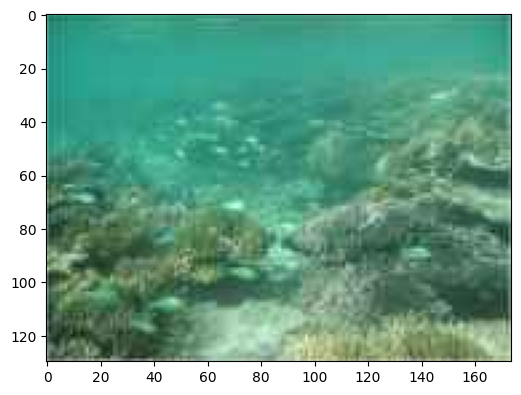

In [2]:
#reading image
img=cv2.imread('/Users/s5284664/Desktop/PAPERS/haze_image.jpeg')
im=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(im)

In [3]:
#Converting to LAB space
lab_img=cv2.cvtColor(img,cv2.COLOR_BGR2LAB)

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 3.000e+00,
        1.000e+01, 1.000e+00, 1.100e+01, 2.600e+01, 1.400e+01, 3.000e+01,
        3.000e+01, 5.300e+01, 4.200e+01, 9.900e+01, 7.400e+01, 1.340e+02,
        1.480e+02, 1.030e+02, 1.620e+02, 1.220e+02, 1.980e+02, 1.420e+02,
        2.130e+02, 1.670e+02, 2.940e+02, 1.930e+02, 3.610e+02, 3.460e+02,
        1.900e+02, 3.350e+02, 2.210e+02, 3.500e+02, 2.540e+02, 3.770e+02,
        2.710e+02, 4.240e+02, 5.080e+02, 3.550e+02, 6.290e+02, 4.160e+02,
        7.840e+02, 5.910e+02, 9.340e+02, 8.420e+02, 1.264e+03, 1.063e+03,
        1.293e+03, 1.853e+03, 1.170e+03, 1.114e+03, 4.480e+02, 5.890e+02,
        3.100e+02, 4.510e+02, 2.650e+02, 3.250e+02, 2.990e+02, 1.710e+02,
        2.160e+02, 1.350e+02, 1.930e+02, 1.000e+02, 1.360e+02, 9.400e+01,
        1.160e+02, 7.600e+01, 8.700e+0

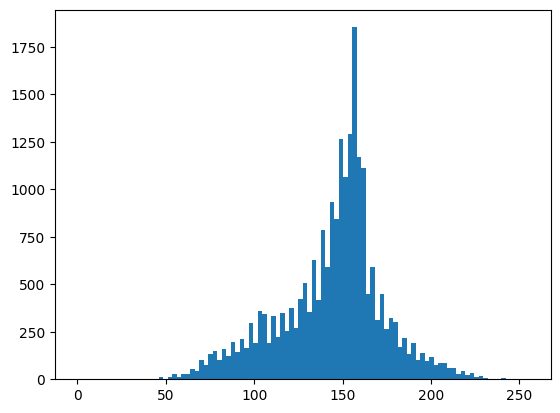

In [4]:
#splitting lab image
l,a,b=cv2.split(lab_img)
plt.hist(l.flat,bins=100,range=(0,255))


(array([204., 282., 158., 259., 167., 283., 193., 244., 166., 228., 336.,
        118., 239., 185., 315., 132., 324., 118., 245., 255., 260., 271.,
        135., 289., 160., 155., 193., 355., 209., 204., 216., 205., 211.,
        238., 283., 263.,   0., 288., 303., 299.,   0., 284., 351.,   0.,
        404.,   0., 438., 384.,   0., 398.,   0., 482.,   0.,   0., 591.,
          0., 472.,   0., 419.,   0., 455.,   0., 419.,   0.,   0., 619.,
          0.,   0., 699.,   0., 535.,   0.,   0., 613.,   0., 557.,   0.,
        448.,   0., 330., 336., 222., 226., 223., 202., 332., 142., 312.,
        139., 265., 325.,  96., 286., 234., 261., 188., 279., 158., 286.,
        222.]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95,  25.5 ,  28.05,  30.6 ,  33.15,  35.7 ,  38.25,
         40.8 ,  43.35,  45.9 ,  48.45,  51.  ,  53.55,  56.1 ,  58.65,
         61.2 ,  63.75,  66.3 ,  68.85,  71.4 ,  73.95,  76.5 ,  79.05,
         81.6 ,  84.15,  86.7 

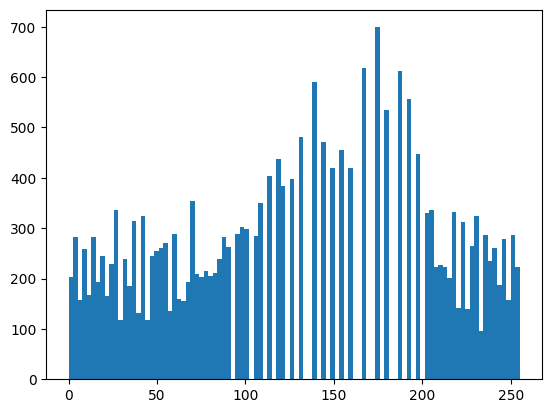

In [5]:
#histogram equalization
equ=cv2.equalizeHist(l)
plt.hist(equ.flat,bins=100,range=(0,255))

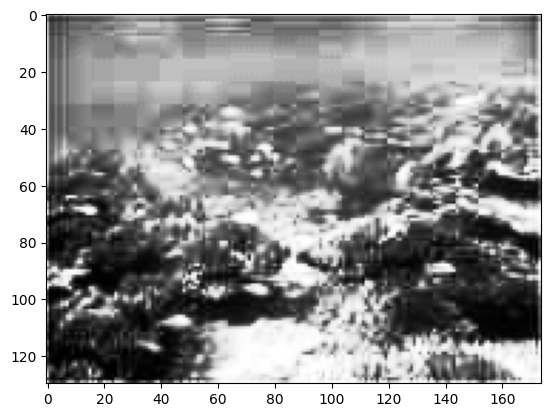

In [6]:
plt.imshow(equ,cmap='gray')

In [11]:
#CLAHE for histogram equalization
updated_image=cv2.merge((equ,a,b))
hist_eq_img=cv2.cvtColor(updated_image,cv2.COLOR_LAB2BGR)
clahe=cv2.createCLAHE(clipLimit=3.0,tileGridSize=(8,8))
clahe_img=clahe.apply(l)
updated_clahe_img=cv2.merge((clahe_img,a,b))
final_clahe_img=cv2.cvtColor(updated_clahe_img,cv2.COLOR_LAB2RGB)

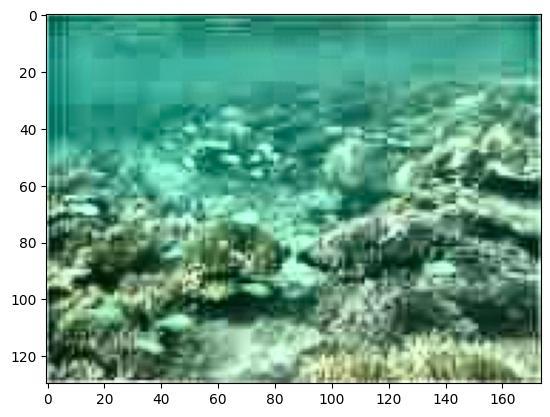

In [12]:
plt.imshow(final_clahe_img)

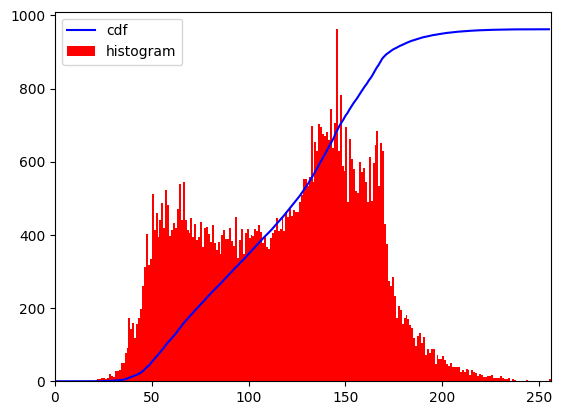

In [13]:
#displaying histogram
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [14]:
#Converting to black and white image
oimg=cv2.imread('/Users/s5284664/Desktop/PAPERS/haze_image.jpeg')
grayImage = cv2.cvtColor(oimg, cv2.COLOR_BGR2GRAY)
(thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
#cv2.imshow("image",blackAndWhiteImage)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [15]:
#Equalizing histogram to stretch the values

ecu = cv2.equalizeHist(blackAndWhiteImage)
#cv2.imshow("image",equ)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

(array([11851.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 10769.]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95

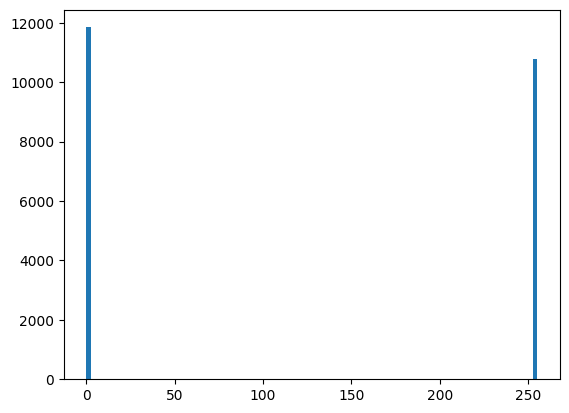

In [16]:
plt.hist(ecu.flat,bins=100,range=(0,255))